In [1]:
import numpy as np
import tqdm 
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
from scipy import interpolate
from matplotlib import colors 

sys.path.append('../my_funcs/')
from pipeline_main import pipeline, dist

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

Initialising patch data


100%|██████████| 4165/4165 [00:10<00:00, 415.20it/s]


Converged mean angular momentum vector after 0 iteration(s)
Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4165/4165 [00:00<00:00, 6335.64it/s]


Disk size: 17.9 au


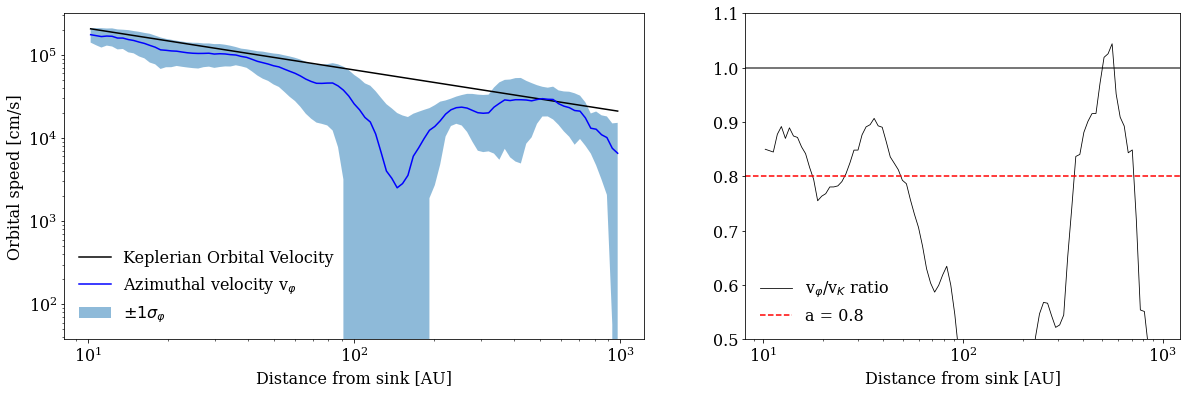

In [2]:
data = pipeline(snap = 357, run = 'my_core_13lacc', sink_id=13)
data.recalc_L(verbose = 1); 
data.calc_disksize()

In [72]:
avgdivB_patch = np.zeros((len(data.sn.patches),2))
patch_id = np.zeros(len(data.sn.patches))
for i, p in enumerate(data.sn.patches):
    dev_x = np.gradient(p.var('bx') * data.sn.scaling.b, p.ds[0] * data.sn.scaling.l)[0]
    dev_y = np.gradient(p.var('by') * data.sn.scaling.b, p.ds[1] * data.sn.scaling.l)[1]
    dev_z = np.gradient(p.var('bz') * data.sn.scaling.b, p.ds[2] * data.sn.scaling.l)[2]
    divB = dev_x + dev_y + dev_z  
    patch_id[i] = p.id
    avgdivB_patch[i] = np.average(divB), np.std(divB) / np.sqrt(16**3)

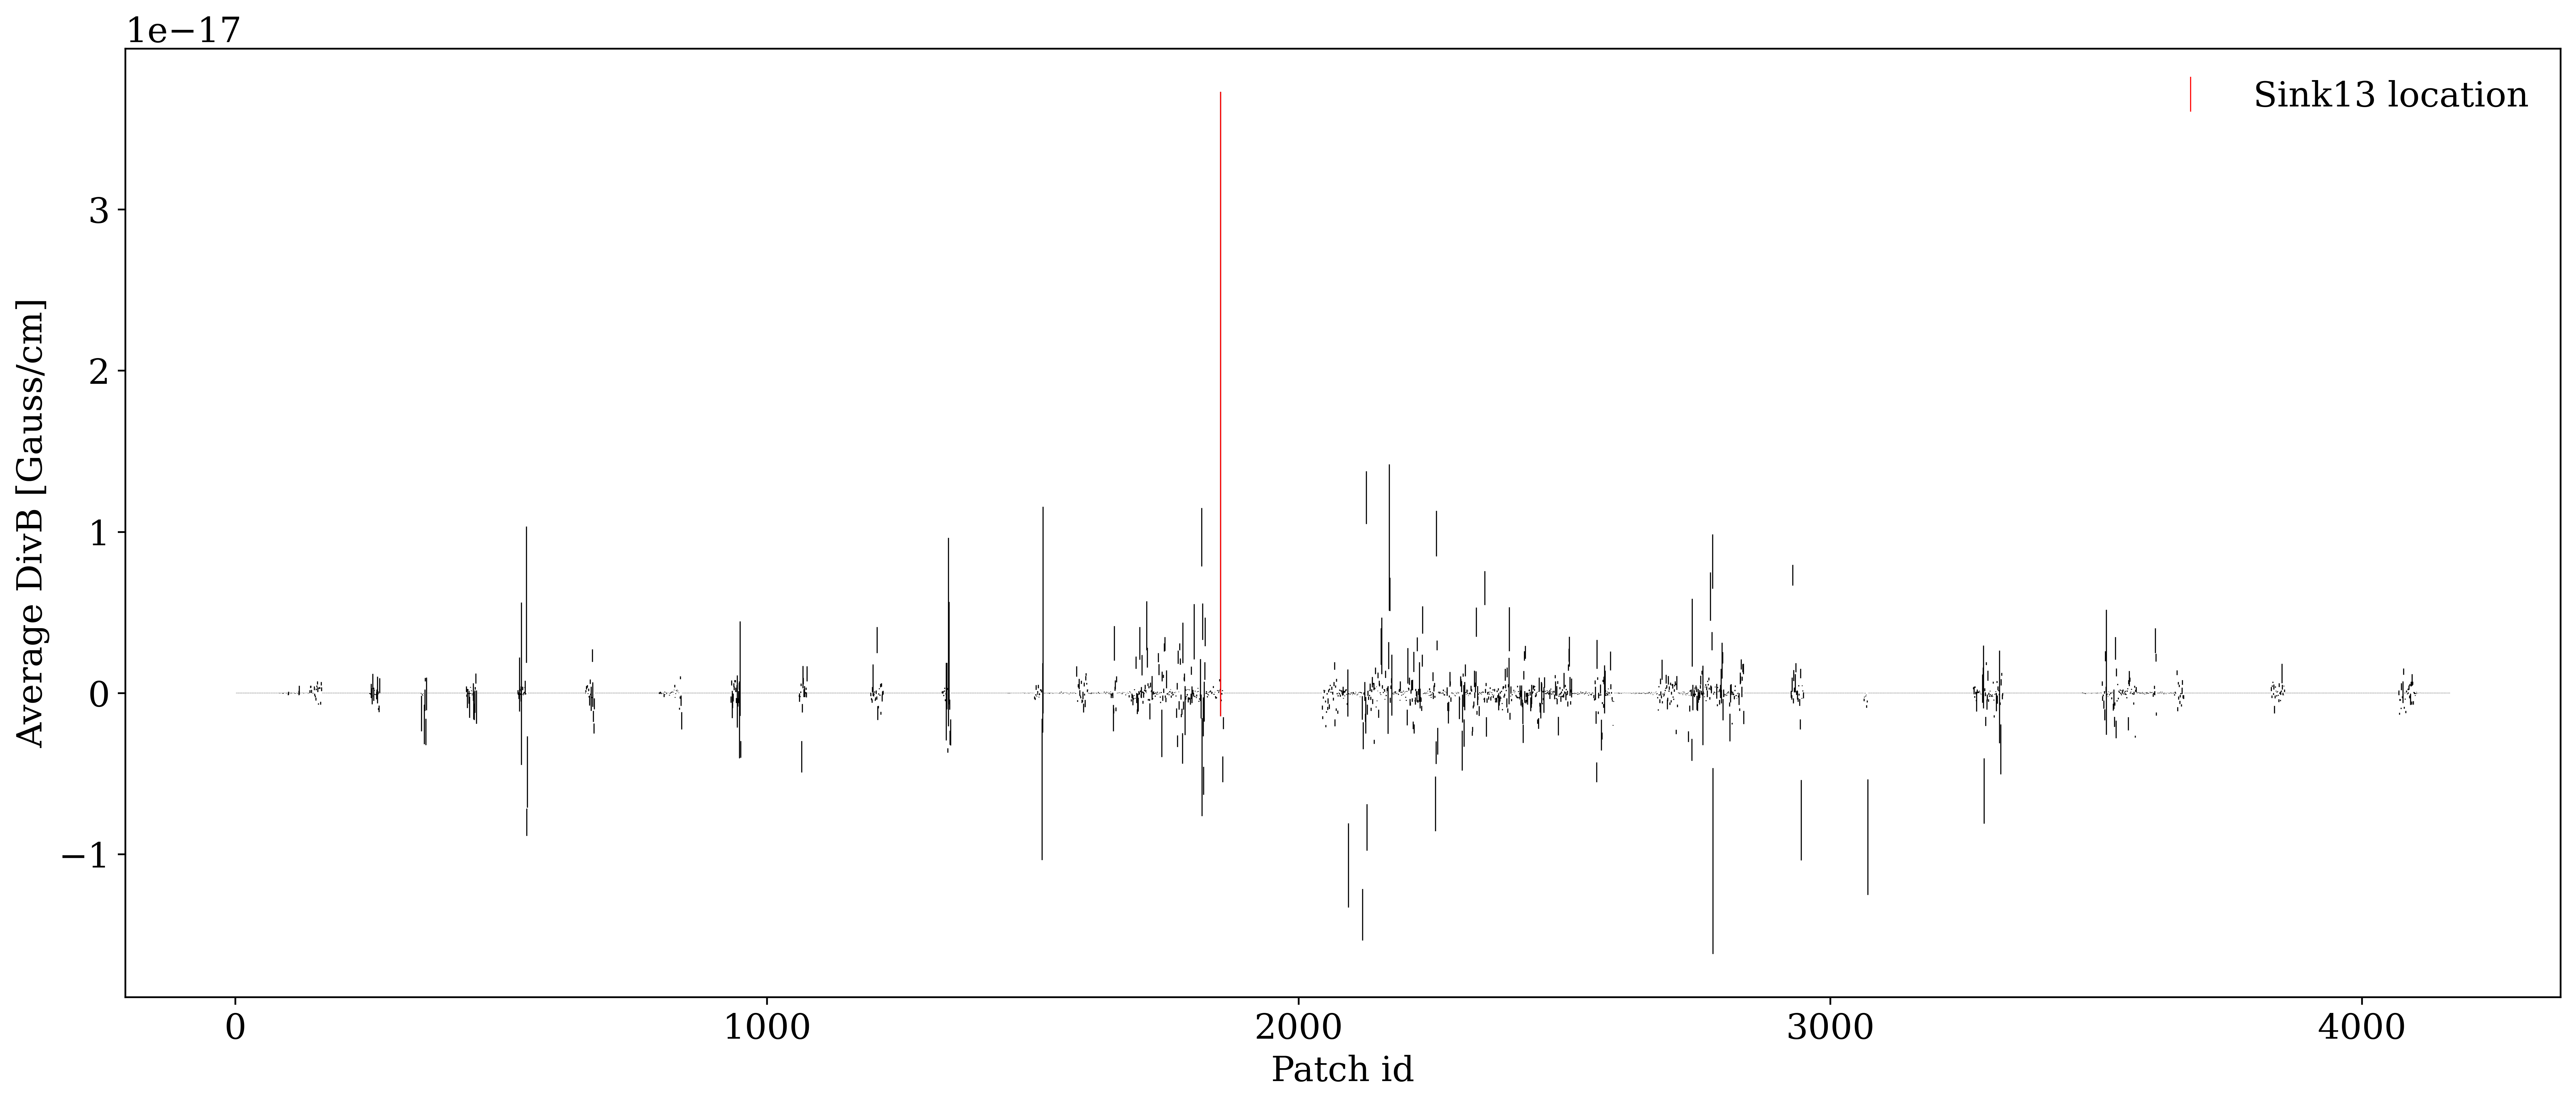

In [83]:
fig, axs = plt.subplots(figsize = (20,8), dpi = 500)
#axs.plot(patch_id, avgdivB_patch[:,0], ',')
axs.errorbar(patch_id, avgdivB_patch[:,0], yerr = avgdivB_patch[:,1], fmt = ',', color = 'black', elinewidth=0.5)
axs.errorbar(patch_id[1852], avgdivB_patch[1852,0], yerr = avgdivB_patch[1852,1], fmt = ',', color = 'red', elinewidth=0.5, label = 'Sink13 location')
axs.set(xlabel = 'Patch id', ylabel = 'Average DivB [Gauss/cm]')

plt.legend(frameon = False)

In [84]:
avgdivB_patch = np.zeros((len(data.sn.patches),2))
patch_id = np.zeros(len(data.sn.patches))
for i, p in enumerate(data.sn.patches):
    dev_x = np.gradient(p.var('bx'), p.ds[0])[0]
    dev_y = np.gradient(p.var('by'), p.ds[1])[1]
    dev_z = np.gradient(p.var('bz'), p.ds[2])[2]
    divB = dev_x + dev_y + dev_z  
    patch_id[i] = p.id
    avgdivB_patch[i] = np.average(divB), np.std(divB) / np.sqrt(16**3)

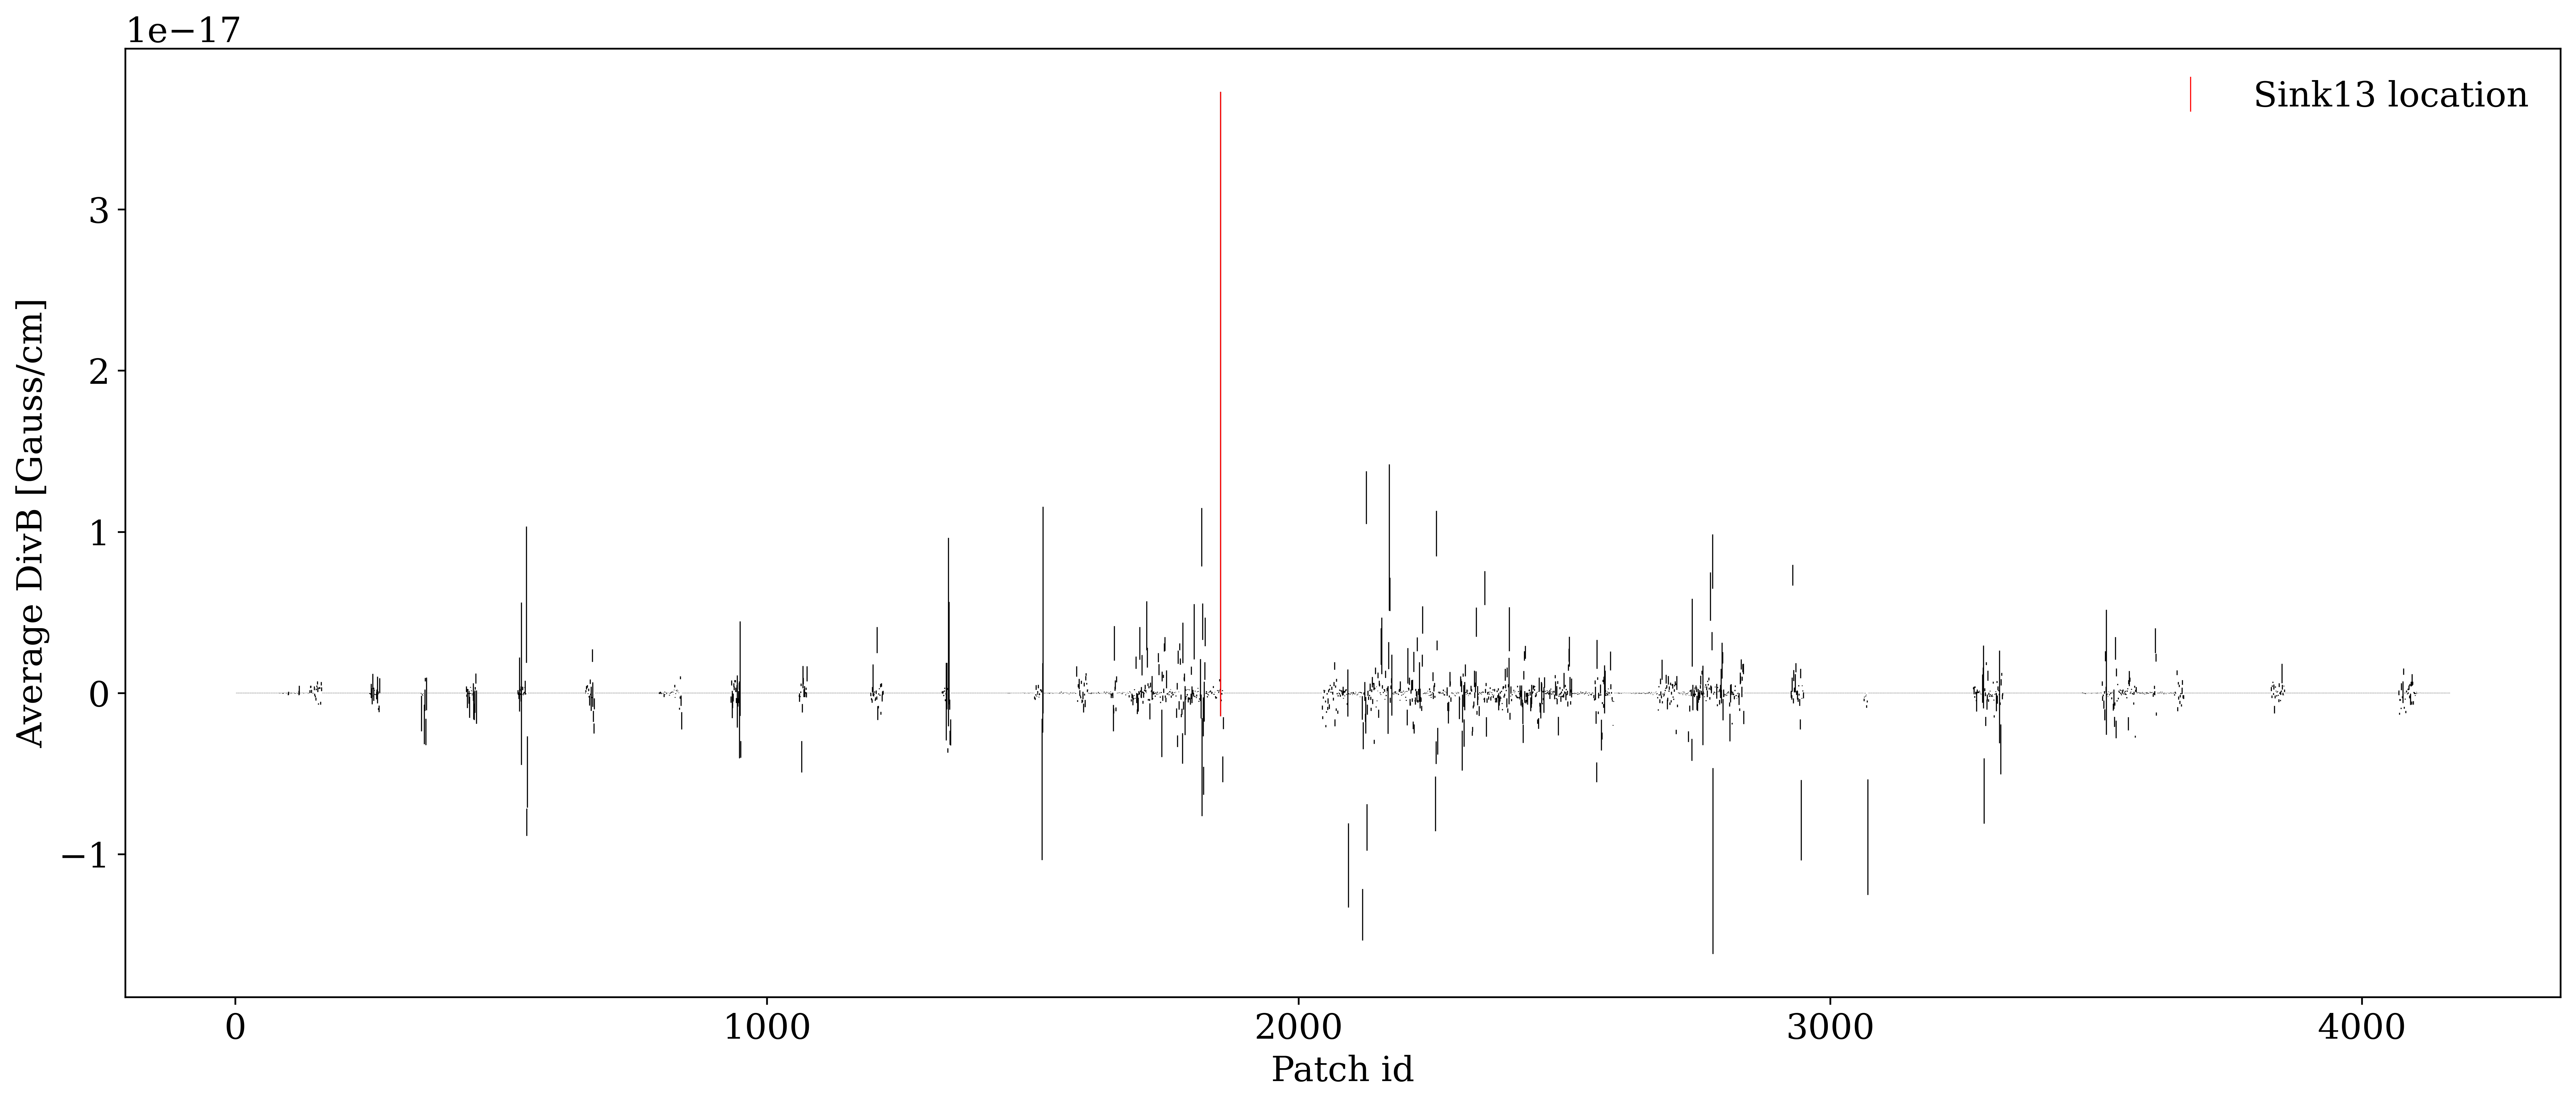

In [85]:
fig, axs = plt.subplots(figsize = (20,8), dpi = 500)
#axs.plot(patch_id, avgdivB_patch[:,0], ',')
axs.errorbar(patch_id, avgdivB_patch[:,0] * data.sn.scaling.b / data.sn.scaling.l, yerr = avgdivB_patch[:,1] * data.sn.scaling.b / data.sn.scaling.l, fmt = ',', color = 'black', elinewidth=0.5)
axs.errorbar(patch_id[1852], avgdivB_patch[1852,0] * data.sn.scaling.b / data.sn.scaling.l, yerr = avgdivB_patch[1852,1] * data.sn.scaling.b / data.sn.scaling.l, fmt = ',', color = 'red', elinewidth=0.5, label = 'Sink13 location')
axs.set(xlabel = 'Patch id', ylabel = 'Average DivB [Gauss/cm]')

plt.legend(frameon = False)

In [86]:
np.array(np.gradient(p.var('bz') * data.sn.scaling.b, p.ds * data.sn.scaling.l, edge_order=2)).shape

TypeError: invalid number of arguments

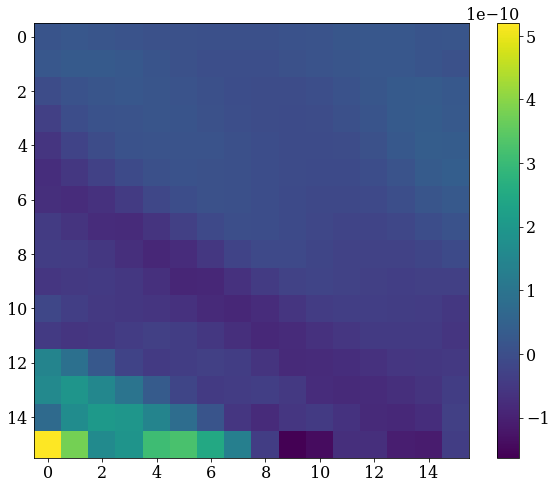

In [41]:
fig, axs = plt.subplots(figsize = (10,8))
cs = plt.imshow(divB[...,8])
fig.colorbar(cs)